# Final Problem Set for Physics 5300 


## Gravitational Orbits in Cartesian Coordinates

Solves the two body problem for gravitational attraction between two bodies in Cartesian Coordinates. 

* Last revised 16-Apr-2019 by Ness Mayker (mayker.1@osu.edu).


For animation: %%capture in cell with initial plot week 11 16p14_A notebook
all the inputs from chapter 16
line 1 and 2
point 1 and 2
plot at initial condition
make function animate orbits which steps through i and pt1_anim.set_data()
anim = animation.FuncAnimation()

## Kinetic Energy

For a two body gravitationally bound system, the kinetic energy (T) is

$\begin{align}
  T = \frac12 m_1(\dot x_1^2+\dot y_1^2)+\frac12 m_2(\dot x_2^2+\dot y_2^2)
\end{align}$

## Potential Energy

The potential energy (U) is

$\begin{align}
  U(r) = \frac{-Gm_1m_2}{r^2}          
\end{align}$

  where $r = ((x_2-x_1)^2+(y_2-y_1)^2)^\frac12$


## Lagrangian

For a two-body, gravitationally-bound system, the Lagrangian in cartesian coordinates is:

$\begin{align}
  \mathcal{L} = \frac12 m_1(\dot x_1^2+\dot y_1^2)+\frac12 m_2(\dot x_2^2+\dot y_2^2)+\frac{Gm_1m_2}{(x_2-x_1)^2+(y_2-y_1)^2}
\end{align}$

## Euler-Lagrange equations

The Euler-Lagrange equations are

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot x_1} = \frac{\partial\mathcal L}{\partial x_1}
 \quad\Longrightarrow\quad
 m_1\ddot x_1 = \frac{-2Gm_1m_2(x_1-x_2)}{((x_2-x_1)^2+(y_2-y_1)^2)^2}
  \;.
\end{align}$

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot x_2} = \frac{\partial\mathcal L}{\partial x_2}
 \quad\Longrightarrow\quad
 m_2\ddot x_2 = \frac{-2Gm_1m_2(x_2-x_1)}{((x_2-x_1)^2+(y_2-y_1)^2)^2}
  \;.
\end{align}$

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot y_1} = \frac{\partial\mathcal L}{\partial y_1}
 \quad\Longrightarrow\quad
 m_1\ddot y_1 = \frac{-2Gm_1m_2(y_1-y_2)}{((x_2-x_1)^2+(y_2-y_1)^2)^2}
  \;.
\end{align}$

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot y_2} = \frac{\partial\mathcal L}{\partial y_2}
 \quad\Longrightarrow\quad
 m_2\ddot y_2 = \frac{-2Gm_1m_2(y_2-y_1)}{((x_2-x_1)^2+(y_2-y_1)^2)^2}
  \;.
\end{align}$

The equations of motion are

$\begin{align}
 \ddot x_1 = \frac{-2Gm_2(x_1-x_2)}{((x_2-x_1)^2+(y_2-y_1)^2)^2}
  \;.
\end{align}$

$\begin{align}
 \ddot x_2 = \frac{-2Gm_1(x_2-x_1)}{((x_2-x_1)^2+(y_2-y_1)^2)^2}
  \;.
\end{align}$

$\begin{align}
 \ddot y_1 = \frac{-2Gm_2(y_1-y_2)}{((x_2-x_1)^2+(y_2-y_1)^2)^2}
  \;.
\end{align}$

$\begin{align}
 \ddot y_2 = \frac{-2Gm_1(y_2-y_1)}{((x_2-x_1)^2+(y_2-y_1)^2)^2}
  \;.
\end{align}$

In [1]:
%matplotlib inline

import numpy as np
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt

# The dpi (dots-per-inch) setting will affect the resolution and how large
#  the plots appear on screen and printed.  So you may want/need to adjust 
#  the figsize when creating the figure.
plt.rcParams['figure.dpi'] = 100.    # this is the default for notebook

# Change the common font size (smaller when higher dpi)
font_size = 10
plt.rcParams.update({'font.size': font_size})

### Orbit Class & Utility Functions

In [2]:
class Orbit():
    """
    Pendulum class implements the parameters and Lagrangian equations for 
     a double pendulum.

    Parameters
    ----------
x1,x2,y1,y2
    m1 : float
        mass of first pendulum bob
    m2 : float
        mass of second pendulum bob
    g : float
        gravitational acceleration at the earth's surface

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, m1=1., m2=10., G=1.,
                ):
        self.m1 = m1
        self.m2 = m2
        self.G  = G
    
    def dz_dt(self, t, z):
        """
        Parameters
        ----------
        t : float
            time 
        z : float
            An 8-component vector with 
            z[0] = x_1(t), z[1] = dx_1/dt, z[2] = x_2(t), z[3] = dx_2/dt, 
            z[4] = y_1(t), z[5] = dy_1/dt, z[6] = y_2(t), z[7] = dy_2/dt,            
        Returns the right-hand side of the diffeq: 
        [dx_1/dt, dx_1^2/dt^2, dx_2/dt, dx_2^2/dt^2, dy_1/dt, dy_1^2/dt^2, dy_2/dt, dy_2^2/dt^2]
        -------
        """
        x1    = z[0]
        x2    = z[2]
        y1    = z[4]
        y2    = z[6]
        x1dot = z[1]
        x2dot = z[3]
        y1dot = z[5]
        y2dot = z[7]
        m1 = self.m1 
        m2 = self.m2 
        G  = self.G
        
        r = ((x2-x1)**2+(y2-y1)**2)**0.5
                   
        x1ddot = -2*G*m2*(x1-x2)*r**(-4)
        x2ddot = -2*G*m1*(x2-x1)*r**(-4)
        y1ddot = -2*G*m2*(y1-y2)*r**(-4)
        y2ddot = -2*G*m1*(y2-y1)*r**(-4)
        
        return [z[1], x1ddot, z[3], x2ddot, z[5], y1ddot, z[7], y2ddot]
    
    def solve_ode(self, t_pts, x1, x1dot_0, x2, x2dot_0, y1, y1dot_0, y2, y2dot_0, 
                  abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        z = [x1, x1dot_0, x2, x2dot_0, y1, y1dot_0, y2, y2dot_0] 
        solution = solve_ivp(self.dz_dt, (t_pts[0], t_pts[-1]), 
                             z, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        x1, x1dot, x2, x2dot, y1, y1dot, y2, y2dot  = solution.y

        return x1, x1dot, x2, x2dot, y1, y1dot, y2, y2dot

### Set up Generic Plotting Function

In [3]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [4]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

### Make Double Pendulum Plots

In [22]:
# Labels for individual plot axes
x_vs_y_labels = ('x', 'y')
phi_dot_vs_time_labels = (r'$t$', r'$d\phi/dt(t)$')
state_space_labels = (r'$\phi$', r'$d\phi/dt$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 500.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

G  = 1.0
m1 = 1.0
m2 = 1.0

# Instantiate a pendulum 
o1 = Orbit(m1=m1, m2=m2, G=G)


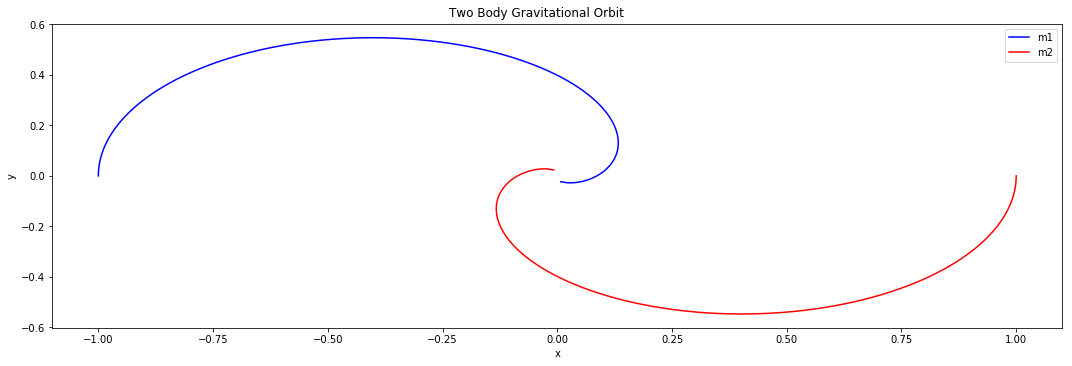

In [24]:
# both plots: same initial conditions
# x1      = 0.0
# x1dot_0 = 10.0
# x2      = 10.0
# x2dot_0 = 10.0
# y1      = 0.0
# y1dot_0 = 0.0
# y2      = 10.0
# y2dot_0 = 0.0
x1 = -1. 
y1 = 0.

x2 = 1. 
y2 = 0. 

x1dot_0 = 0 
y1dot_0 = 1./(2 * 1.414)

x2dot_0 = 0. 
y2dot_0 = -1./(2 * 1.414)
x1, x1dot, x2, x2dot, y1, y1dot, y2, y2dot = o1.solve_ode(t_pts, x1, x1dot_0, x2, x2dot_0, y1, y1dot_0, y2, y2dot_0)

# Plot the orbits
fig = plt.figure(figsize=(15,5))
overall_title = 'Two Body Gravitational Orbit'
fig.suptitle(overall_title, va='baseline')
    
start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x1[start : stop], y1[start : stop],
            axis_labels=x_vs_y_labels, 
            color='blue',
            label='m1', 
            )    
plot_y_vs_x(x2[start : stop], y2[start : stop],
            color='red',
            label='m2') 

fig.tight_layout()
fig.savefig('orbit.png', bbox_inches='tight')  


In [14]:
fig = plt.figure(figsize=(15,5))
overall_title = 'Double Pendulum from Lagrangian:  ' + \
                rf' $\phi1_0 = {phi1_0:.2f},$' + \
                rf'  $\phi2_0 = {phi2_0:.2f},$' + \
                rf' $\dot\phi1_0 = {phi_dot1_0:.2f}$' + \
                rf' $\dot\phi2_0 = {phi_dot2_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')

# state space plot from t=30 to t=50   
start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(phi1[start : stop], phi_dot1[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=r'$\dot\phi_1(t)$', 
            title='State space')  
plot_y_vs_x(phi1[start : stop], phi_dot2[start : stop], 
            axis_labels=state_space_labels, 
            color='red',
            label=r'$\dot\phi_2(t)$')  
fig.tight_layout()
fig.savefig('double_pendulum_statespace.png', bbox_inches='tight')  

NameError: name 'phi1_0' is not defined

<Figure size 1080x360 with 0 Axes>

## Extend System to 3 pendulums

In [ ]:
#Help me

### Set up Animation Functions

In [ ]:
from matplotlib import animation, rc
from IPython.display import HTML

class AnimationPendulumPlot():
    """
    AnimationPlot class uses matplotlib.animation.FuncAnimation to animate
     the dynamics of an oscillator.  This includes a simple time dependence
     graph, a state space graph with Poincare map, and a physical model.
     
     We'll start with a pendulum and then generalize later.
     
    Parameters
    ----------
    phi_vs_t : boolean
        If True, plot phi(t) vs. t
    
    phi_dot_vs_t : boolean
        If True, plot phi_dot(t) vs. t
    
    state_space : boolean
        If True, plot phi_dot(t) s. phi(t)
    
    physics_pend : boolean
        If True, draw the pendulum at phi(t) vs. t


    Methods
    -------
    plot_setup
    
    t_pts_init
    
    add_pendulum
    
    animate_pendulum
    
    plot_setup
    
    start_animation
    """
    def __init__(self, phi_vs_t=True, phi_dot_vs_t=False,
                 state_space=True, physical_pend=True):
        self.pendulums = []
        self.length = 0.8
                  
    def t_pts_init(self, t_start=0., t_end=100., delta_t=0.01): 
        """Create the array of time points for the full iteration"""
        self.t_start = t_start
        self.t_end = t_end
        self.delta_t = delta_t
        self.t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

    def add_pendulum(self, pend, phi_0=0., phi_dot_0=0.):
        """Add a pendulum to be plotted as a class instance of Pendulum
            along with initial conditions.  So it knows all of the parameters
            as well through the Pendulum class.
        """
        self.pend = pend
        self.phi_0 = phi_0
        self.phi_dot_0 = phi_dot_0
        phi, phi_dot = pend.solve_ode(self.t_pts, self.phi_0, self.phi_dot_0)
        self.pendulums.append((phi, phi_dot))
    
    def plot_setup(self, plot_start, plot_end):
        """Set up the plots to be displayed. """

            # start the plot!
#         overall_title = 'Parameters:  ' + \
#                         rf' $\omega = {omega_ext:.2f},$' + \
#                         rf' $\gamma = {gamma_ext:.3f},$' + \
#                         rf' $\omega_0 = {omega_0:.2f},$' + \
#                         rf' $\beta = {beta:.2f},$' + \
#                         rf'  $\phi_0 = {phi_0:.2f},$' + \
#                         rf' $\dot\phi_0 = {phi_dot_0:.2f}$' + \
#                         '\n'     # \n means a new line (adds some space here)
#         self.fig = plt.figure(figsize=(10,3.3), num='Pendulum Plots')
#         self.fig.suptitle(overall_title, va='top')

        # Labels for individual plot axes
        phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
        phi_dot_vs_time_labels = (r'$t$', r'$d\phi/dt(t)$')
        state_space_labels = (r'$\phi$', r'$d\phi/dt$')
                
        
        # make new arrays
        self.start, self.stop = start_stop_indices(self.t_pts, plot_start, 
                                                   plot_end)
        self.t_pts_plt = self.t_pts[self.start : self.stop]
        self.pendulums_plot = []
        for phi_tuple in self.pendulums:
            phi, phi_dot = phi_tuple
            phi_plt = phi[self.start : self.stop]
            phi_dot_plt = phi_dot[self.start : self.stop]
            self.pendulums_plot.append( (phi_plt, phi_dot_plt) )

            
        self.fig = plt.figure(figsize=(10, 3.3), num='Pendulum animation')

        self.ax_1 = self.fig.add_subplot(1,3,1)        
        self.line_1, = self.ax_1.plot(self.t_pts_plt, phi_plt, 
                                      color='blue')
        self.pt_1, = self.ax_1.plot(self.t_pts_plt[0], phi_plt[0], 
                                    'o', color='red')
        self.ax_1.set_xlabel(r'$t$')
        self.ax_1.set_ylabel(r'$\phi(t)$')
        
        
        self.ax_2 = self.fig.add_subplot(1,3,2, projection='polar')
        self.ax_2.set_aspect(1)   # aspect ratio 1 subplot
        self.ax_2.set_rorigin(0.)   # origin in the middle
        self.ax_2.set_theta_zero_location('S')  # phi=0 at the bottom
        self.ax_2.set_ylim(-1.,1.)  # r goes from 0 to 1
        self.ax_2.grid(False)   # no longitude/lattitude lines
        self.ax_2.set_xticklabels([])   # turn off angle labels
        self.ax_2.set_yticklabels([])    # turn off radial labels
        self.ax_2.spines['polar'].set_visible(False) # no circular border
        
        self.length = 0.8
        self.ax_2.plot(0, 0, color='black', marker='o', markersize=5)
        self.line_2, = self.ax_2.plot([phi_plt[0], phi_plt[0]], 
                                      [0.,self.length], 
                                      color='blue', lw=3)
        self.pt_2, = self.ax_2.plot(phi_plt[0], self.length, 
                                    marker='o', markersize=15, color='red')
        phi_string = rf'$\phi = {phi_plt[0]:.1f}$'
        self.phi_text = self.ax_2.text(np.pi, 1., phi_string, 
                                       horizontalalignment='center')
        
        
        self.ax_3 = self.fig.add_subplot(1,3,3)
        self.line_3, = self.ax_3.plot(phi_plt, phi_dot_plt, 
                                      color='blue')
        self.pt_3, = self.ax_3.plot(phi_plt[0], phi_dot_plt[0], 
                                    'o', color='red')
        self.ax_3.set_xlabel(r'$\phi$')
        self.ax_3.set_ylabel(r'$\dot\phi$')
        
        self.fig.tight_layout()
        

    def animate_pendulum(self, i, t_pts_skip, phi_skip, phi_dot_skip):
        self.pt_1.set_data(t_pts_skip[i], phi_skip[i])

        self.line_2.set_data([phi_skip[i], phi_skip[i]], [0., self.length])
        self.pt_2.set_data(phi_skip[i], self.length)
        phi_string = rf'$\phi = {phi_skip[i]:.1f}$'
        self.phi_text.set_text(phi_string)

        self.pt_3.set_data(phi_skip[i], phi_dot_skip[i])

        return self.pt_1, self.pt_2, self.phi_text, self.pt_3
          
        
    def start_animation(self, skip=2, interval=25.):
        self.skip = skip          # skip between points in t_pts array
        self.interval = interval  # time between frames in milliseconds
        
        phi_plt, phi_dot_plt = self.pendulums_plot[0]
        self.anim = animation.FuncAnimation(self.fig, self.animate_pendulum, 
                           fargs=(self.t_pts_plt[::self.skip], 
                                  phi_plt[::self.skip],
                                  phi_dot_plt[::self.skip]), 
                           init_func=None,
                           frames=len(self.t_pts_plt[::self.skip]), 
                           interval=self.interval, 
                           blit=True, repeat=False,
                           save_count=0)

        #HTML(anim.to_jshtml())
        self.fig.show()


### Add Widgets

In [ ]:
# Create a pendulum animation instance. 
pendulum_anim = AnimationPendulumPlot(phi_vs_t=True, 
                                      state_space=True,
                                      physical_pend=True)

# Common plotting time (generate the full time here then use slices below)
t_start = 0.
t_end = 100.
delta_t = 0.01
pendulum_anim.t_pts_init(t_start, t_end, delta_t)

# Pendulum parameters
phi1_0 = (3./4.)*np.pi
phi2_0 = (3./4.)*np.pi
phi_dot1_0 = 0.
phi_dot2_0 = 0.
phi1, phi2, phi_dot1, phi_dot2 = p1.solve_ode(t_pts, phi1_0, phi2_0, phi_dot1_0, phi_dot2_0)

# Instantiate a pendulum 
p1 = Pendulum(omega_0=omega_0, beta=beta, 
              gamma_ext=gamma_ext, omega_ext=omega_ext, phi_ext=phi_ext)

# Initial conditions specified
phi_0 = -np.pi / 2.
phi_dot_0 = 0.0

# Add a pendulum to the animation plots; this solves the differential
#  equation for the full t_pts array, generating phi and phi_dot internally. 
pendulum_anim.add_pendulum(p1, phi_0, phi_dot_0)